# Bank Customer Churn Analysis

## Business Understanding

Stakeholder: Bank Owners and Managers that want to better understand if there is an identifiable pattern that we can find that will help to predict whether or not a customer will leave the bank.

## Data Understanding

The data used in this project is sourced from [Kaggle](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn).

The dataset contains 18 columns housing 10,000 unique bank customer records. Generally speaking, the columns in this dataset contain various demographic measures, like age and country where the customer is living, along with recorded metrics that the bank is tracking like the Balance in each customer's account and how long the customer has held an account at the bank. A detailed description of each column was provided by the auther of the dataset, and I have copied it below:

#### Column Descriptions - from Kaggle:
- RowNumber—corresponds to the record (row) number and has no effect on the output.
- CustomerId—contains random values and has no effect on customer leaving the bank.
- Surname—the surname of a customer has no impact on their decision to leave the bank.
- CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography—a customer’s location can affect their decision to leave the bank.
- Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts—refers to the number of products that a customer has purchased through the bank.
- HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember—active customers are less likely to leave the bank.
- EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited—whether or not the customer left the bank.
- Complain—customer has complaint or not.
- Satisfaction Score—Score provided by the customer for their complaint resolution.
- Card Type—type of card hold by the customer.
- Points Earned—the points earned by the customer for using credit card.

## Data Preparation

### Import Libraries + Tools:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier

from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix 
from sklearn.metrics import plot_roc_curve, accuracy_score, recall_score, precision_score, f1_score

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
df = pd.read_csv('data/Customer-Churn-Records.csv')

### Exploratory Data Analysis

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df.dtypes.value_counts()

int64      12
object      4
float64     2
dtype: int64

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


#### EDA Inital Results:
- The data does not have any null values to address.
- There are unneccessary columns that will need to be dropped:
    - RowNumber: This appears to be a duplicate index.
    - CustomerId: We are not analyzing specifc customer records, therefore we would not need to keep any information identifying individuals
    - Surname: similar information to the CustomerId column, we do not need individuals' information for this analysis.
- Certain 'object' type columns containing categorical variables need to be dealt with before being added to a model.
    - Geography: Spain, France, Germany
    - Gender: Male, Female
    - Card Type: DIAMOND, GOLD, SILVER, PLATINUM
- There are numeric columns that contain values that appear to be binary or their values may be ordinal.
    - Binary columns: 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain' 
    - Ordinal column: 'Satisfaction Score'
        - Will need to treat this column more like a categorical variable than a numeric feature.


#### Dropping Columns (reasoning desc. above):

In [7]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [8]:
df.shape

(10000, 15)

#### Feature/Column Further Exploration:

##### Categorical Columns:

In [9]:
df['Geography'].value_counts()
# Will need to be processed - can be made into a binary variable columns via OneHotEncoder
# France appears to have the greatest number of Customers represented, at almost double both of the other countries

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df['Gender'].value_counts()
# Will need to be processed - can be made into a binary variable column via OneHotEncoder

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df['Card Type'].value_counts()
# Will need pre-processing, could OneHotEncode out this column
## Appears that each of the card types has around 1/4 of all of the records (~2500 each)

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64

##### Ordinal Column:

In [12]:
df['Satisfaction Score'].value_counts()
# The values in this column appear to be ordinal, with a 5 as the highest satisfaction rating, 1 as the lowest
# Each of the 5 satisfaction ratings appears to have recieved virtually the same number of scores, with the exception of 1 (which is still very close)

3    2042
2    2014
4    2008
5    2004
1    1932
Name: Satisfaction Score, dtype: int64

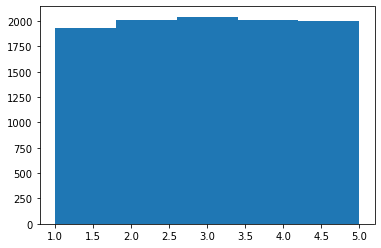

In [13]:
plt.hist(df['Satisfaction Score'], bins=5);

##### Binary Categorical Columns
- No additional preprocessing needed in order to include model with these variables:

In [14]:
df['Exited'].value_counts() # Likely going to be the target. 1 appears to represent if a customer left (churned)
## Appears to be slighly imbalanced, but not terribly so. Roughly 80/20 stay/leave

0    7962
1    2038
Name: Exited, dtype: int64

In [15]:
df['HasCrCard'].value_counts()
# Binary values - will not need to preprocess this any further. 1 represents a customer with a CC.

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [16]:
df['IsActiveMember'].value_counts()
# Binary values - no preprocessing needed. 1 rep's a subjective figure that a customer 'IS active'?
## Not sure what defines active vs inactive, and there doesn't appear to be add'l details provided.

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [17]:
df['Complain'].value_counts()
# Binary, It appears that most (80%) of custmers have not filed complaints - this may be a key value...

0    7956
1    2044
Name: Complain, dtype: int64

##### Numeric Columns:

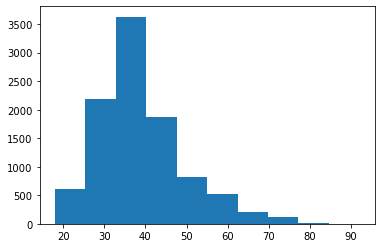

In [18]:
plt.hist(df['Age']);

In [19]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

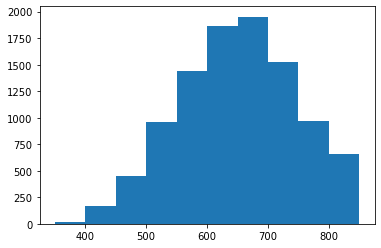

In [20]:
plt.hist(df['CreditScore']);

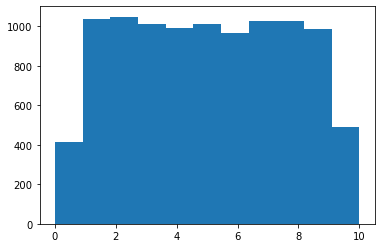

In [21]:
plt.hist(df['Tenure'], bins=11);
# With the Tenure values from 1-9 being virtually equal, this is likely NOT a good feature to measure churn.

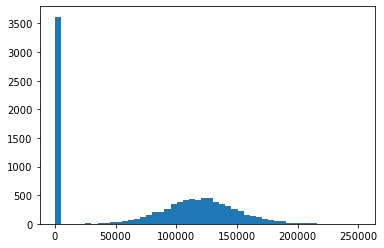

In [22]:
plt.hist(df['Balance'], bins=50);
# A LOT of zeros, this feature may skew our data??

In [23]:
df['NumOfProducts'].value_counts()
# May need to split this value into 4 separate columns! (OneHotEncode?)

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

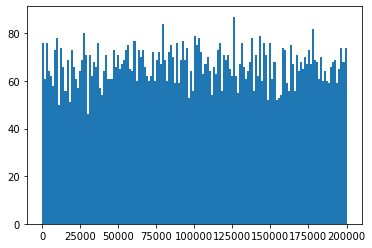

In [24]:
plt.hist(df['EstimatedSalary'], bins=150);
# It appears that this column's values are widely distributed and there is variety of salaries represented (somewhat evenly)

In [25]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

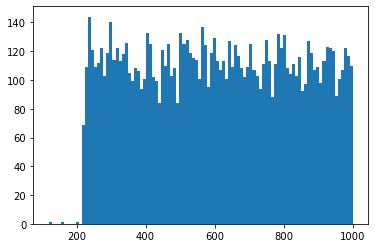

In [26]:
plt.hist(df['Point Earned'], bins=100);

## Modeling

#### Target Identified: the 'Exited' column.
- A 0 represents a customer that DID NOT leave the bank.
    - It appears that about 80% of customers have remained at the bank.
- A 1 represents a customer that DID leave the bank AKA a customer that churned.
    - It appears that about 20% of customers have left the bank.

In [27]:
df['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

#### Exploring the Relationships between the target and other features:
- It appears that the 'Complain' column, which denotes whether or not a customer has filed a complaint (1 meaning Yes, a complaint was filed), almost perfectly correlates with the target. This is a KEY feature for this reason, and including this feature or not will likely have a major impact on how the models will learn to predict churn.

In [28]:
df_corrs = df.corr()['Exited'].map(abs).sort_values(ascending=False)
df_corrs

Exited                1.000000
Complain              0.995693
Age                   0.285296
IsActiveMember        0.156356
Balance               0.118577
NumOfProducts         0.047611
CreditScore           0.026771
Tenure                0.013656
EstimatedSalary       0.012490
HasCrCard             0.006976
Satisfaction Score    0.005849
Point Earned          0.004628
Name: Exited, dtype: float64

#### Splitting Categorical and Numeric Data
- Numeric data is readily able to be used in a model, whereas categorical data will require preporcessing. For the first model iterations, I will only use numeric data to get a baseline model.

In [29]:
categorical = ['Geography', 'Gender', 'Satisfaction Score', 'Card Type']

In [30]:
numeric = df.drop(categorical, axis=1)

In [31]:
numeric.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Point Earned
0,619,42,2,0.00,1,1,1,101348.88,1,1,464
1,608,41,1,83807.86,1,0,1,112542.58,0,1,456
2,502,42,8,159660.80,3,1,0,113931.57,1,1,377
3,699,39,1,0.00,2,0,0,93826.63,0,0,350
4,850,43,2,125510.82,1,1,1,79084.10,0,0,425


### Model 1: Dummy - Numeric Data Only

The X values, or features, in this first model represent the independent variables that we want to measure as they effect our target value: y. Previously, the 'Exited' column was identified as the target, and in order to analysis the effect the features have on this target, we must isolate this column and assign it 'y'.

Next we will run a train_test_split, in order to separate our data into a training set that we can use to train our model, and a testing set, which will remain unseen until the end of this process, when a final model iteration is chosen.

In [32]:
X = numeric.drop('Exited', axis=1)
y = numeric['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Checking the value_counts and normalizing the results, below, gives us a look at the distribution of the positive (1s) and negative (0s) values contained in this column. Note that we will see a similar value throughout this first modeling process based on how we configure the dummy classifier model type.

In [33]:
y_train.value_counts(normalize=True)

0    0.7976
1    0.2024
Name: Exited, dtype: float64

Now we will instantiate 'model_1' as a DummyClassifier, setting the strategy to identify churned values every time so we can get a very basic first model. Then we fit the model and check that the model is correctly predicting all 1's.

In [34]:
model_1 = DummyClassifier(strategy='constant', constant=1) #Instantiate

In [35]:
model_1.fit(X_train, y_train) #Fit

DummyClassifier(constant=1, strategy='constant')

In [36]:
model_1.predict(X_train) # should be ALL zeros

array([1, 1, 1, ..., 1, 1, 1])

Checking the accuracy score, we find that this dummy model is able to predict that a customer IS churning (1) at ~20% accuracy, which is similar, almost equal to the value we found running a value_counts on the 'Exited' column alone.

In [37]:
model_1.score(X_train, y_train) 

0.2024

As expected, the cross validated score for this dummy model is ~20% too, meaning that even re-distirbuting the training data into multiple iterations within the original split of training data did not yield different results. Cross validating can often expose errors in splitting that can occur randomly when a train_test_split is performed. In this case, no such anomolys appear to be present.

In [38]:
cross_val_score(model_1, X_train, y_train, cv=5).mean()

0.2024

In [39]:
recall_score(y_train, model_1.predict(X_train))

1.0

To visualize the results of this model, we will plot a confusion matrix. We can see that the model accurately predicted 1518 customers as leaving, while also incorrectly predicting that the other 5982 customers would leave, when they actually stayed with the Bank. 

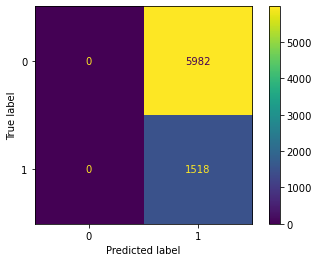

In [40]:
plot_confusion_matrix(model_1, X_train, y_train);

Another method to check how well our model is predicting values, is to plot a ROC curve - pictured below, this curve appears as a straight line becasue this model iteration is predicting ONLY the most frequent (0) values, the area under the curve is .5, the lowest it can be. 

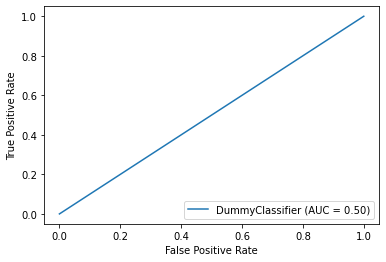

In [41]:
plot_roc_curve(model_1, X_train, y_train);

### Model 2: Logisitc Regression - Numeric Features Only

We will use the same X and y values from above, as they have already been appropriately split into training and testing data that only includes numeric value columns.

The numeric data needs to be scaled so columns with vastly different numeric values - like a binary column containing just 1s and 0s, compared to the 'Balance' column containing dollar amounts in the thousands, can be combined into a single multi-feature model.

We will fit our Scaler to the training data ONLY, but still need to tranform our testing data so it aligns with what our model expects to see when we introduce the testing data to the model at the end of the process.

In [42]:
scaler = StandardScaler() # Instantiate
X_train_sc = scaler.fit_transform(X_train) # Fit and transform to training data for X
X_test_sc = scaler.transform(X_test) # Transform the testing data 

For model_2, we will be using logistic regression to model our features' effects on our target variable. This model should account for the individual feature's effects better than the dummy model above that made a generalized assumption that ALL values would negative in our target (0s). 

In [43]:
model_2 = LogisticRegression() # Instantiate

In [44]:
model_2.fit(X_train_sc, y_train) # Fit to the training data

LogisticRegression()

Checking the accuracy score of model_2 appears significantly high, with 1.0 being assigned to a 'perfect' model. This indicates that some mix of features (or one significantly correlated feature) are able to VERY accurately predict the value in the target column. Let's run a few additional tests to see if this model is just overfit or if it is actually performing at a near perfect level:

In [45]:
model_2.score(X_train_sc, y_train) # Accurracy score

0.9988

In [46]:
model_2.predict_proba(X_train_sc)[:100] # Checking the prediction probabilities in the data to see how high the  
                                        # probabilty is that the model is predicting each of the target options

array([[9.98710632e-01, 1.28936758e-03],
       [9.99774679e-01, 2.25320734e-04],
       [9.99495735e-01, 5.04265205e-04],
       [9.99422863e-01, 5.77137311e-04],
       [9.99178970e-01, 8.21030276e-04],
       [9.99228604e-01, 7.71395992e-04],
       [9.98263704e-01, 1.73629606e-03],
       [9.99898837e-01, 1.01162924e-04],
       [1.71239123e-03, 9.98287609e-01],
       [9.99799542e-01, 2.00457635e-04],
       [9.99020939e-01, 9.79061117e-04],
       [9.99866652e-01, 1.33348495e-04],
       [9.99491867e-01, 5.08132873e-04],
       [9.99153879e-01, 8.46120510e-04],
       [9.99507835e-01, 4.92164769e-04],
       [1.51584281e-03, 9.98484157e-01],
       [3.62559918e-03, 9.96374401e-01],
       [9.97668455e-01, 2.33154495e-03],
       [9.99317350e-01, 6.82649792e-04],
       [9.99884603e-01, 1.15397121e-04],
       [9.99735617e-01, 2.64382613e-04],
       [9.99567271e-01, 4.32728911e-04],
       [9.99632080e-01, 3.67920023e-04],
       [3.53303408e-03, 9.96466966e-01],
       [9.831051

Visualizing this nearly perfect set of predictions in two different ways, to confirm the results found above. From viewing the confusion matrices, it appears that only 2 customers were predicted to stay when they actually left and only 7 customers were exepected to churn, when they actually stayed.

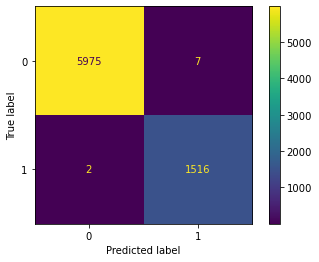

In [47]:
plot_confusion_matrix(model_2, X_train_sc, y_train);

Cross validating our model's results corroborates our findings along with each of the subsequent scores below:

In [48]:
cross_val_score(model_2, X_train_sc, y_train, cv=5).mean()

0.9987999999999999

In [49]:
accuracy_score(y_train, model_2.predict(X_train_sc))

0.9988

A recall score of ~.9987 tells us that the model rarely (in this case only twice), incorrectly predicted that a customer would not churn, when in fact they did leave. This score is calcluated as a ratio of correct predictions of customers leaving (1516) divided by the total number of customers that ultimately left (1516 + 2).

In [50]:
recall_score(y_train, model_2.predict(X_train_sc))

0.9986824769433466

A precision score of ~.9954 reflects that the model was slightly less able to correctly predict when a customer would churn, as effected by the 7 customers that the model predicted to leave, but did not. This score represents the number of customers correctly predicted to leave (1516) divided by the total number of customers predicted to leave (1516 + 7). 

In [51]:
precision_score(y_train, model_2.predict(X_train_sc))

0.9954038082731451

The f1 score reflects a combination of both the recall and precision scores. It is more complicated to explain in a non-technical fashion, and often it is not included when speaking to stakeholders for this reason. 

In [52]:
f1_score(y_train, model_2.predict(X_train_sc))

0.9970404472213088

A summary of the training scores detailed above:

In [53]:
print('Model 2: Training Data Scores')
print('-----------------------------')
print(f'Accuracy:   {accuracy_score(y_train, model_2.predict(X_train_sc))}')
print(f'Recall:     {recall_score(y_train, model_2.predict(X_train_sc))}')
print(f'Precision:  {precision_score(y_train, model_2.predict(X_train_sc))}')
print(f'F1:         {f1_score(y_train, model_2.predict(X_train_sc))}')

Model 2: Training Data Scores
-----------------------------
Accuracy:   0.9988
Recall:     0.9986824769433466
Precision:  0.9954038082731451
F1:         0.9970404472213088


### A near-perfect model? How?
- Recall from the EDA that the values in the 'Complain' column almost perfectly correlate with the values in the 'Exited' column. This linear relationship suggests that a 1 in the 'Complain' column almost always indicates that there will be a 1 in the 'Exited' column. 
- Said another way - it appears that nearly every time a customer complains, that customer then leaves or churns. 
- Naturally, having a perfect model sounds ideal, but from a business sense, what is this result suggesting?
    - One option, is to isolate this feature and further analyze the individual cases when a customer complained:
        - What caused the grievance?
        - Was the complaint addressed in a timely manner?
        - What improvements can be made to the customer experience to avoid future complaints and poor customer service received when a customer is frustrated?
    - Another option is to recognize the significance of this feature and complete the analysis above separate from the model, so we may be better able to understand if there are other features contributing to the likelihood that a customer will churn. Moving into our next model iterations, we will be dropping the 'Complain' column in order to best identify any additional features that may have larger impacts on the churn rate.

### Model 3: Logisitc Regression - Numeric Features Only + Dropping 'Complain'

We need to reassign, split and scale our data contained in the X features variable, with the 'Complain' column dropped to continue our analysis:

In [54]:
Xnew = X.drop('Complain', axis=1) # the 'Exited' target column was already dropped.
y = numeric['Exited'] # y remains the same, but I've copied it here from reference.

Xnew_train, Xnew_test, y_train, y_test = train_test_split(Xnew, y, random_state=1)

In [55]:
y_test.shape

(2500,)

In [56]:
Xnew # Checking to see that 'Complain' was properly dropped:

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Point Earned
0,619,42,2,0.00,1,1,1,101348.88,464
1,608,41,1,83807.86,1,0,1,112542.58,456
2,502,42,8,159660.80,3,1,0,113931.57,377
3,699,39,1,0.00,2,0,0,93826.63,350
4,850,43,2,125510.82,1,1,1,79084.10,425
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,300
9996,516,35,10,57369.61,1,1,1,101699.77,771
9997,709,36,7,0.00,1,0,1,42085.58,564
9998,772,42,3,75075.31,2,1,0,92888.52,339


In [57]:
Xnew_train_sc = scaler.fit_transform(Xnew_train) # Fitting the previoiusly instantiated scaler to this new training data
Xnew_test_sc = scaler.transform(Xnew_test) # Transforming BOTH the training and test data

In [58]:
model_3 = LogisticRegression() # Instantiating a new LogisticRegression model
model_3.fit(Xnew_train_sc, y_train) # Fitting to our newly split training data

LogisticRegression()

Checking the new accuracy score for this model, we immediately notice a difference. This accuracy score is much more simliar to our dummy model above. This score does not tell us how well our model is performing overall, however. In order to gain a better understanding, we need to check the effect on the recall and precision scores too and then cross-validate:

In [59]:
model_3.score(Xnew_train_sc, y_train) 

0.806

Visualizing this new model's predictive abilities shows that the model incorrectly predicted that 1299 customers would NOT leave, when in fact they did! 

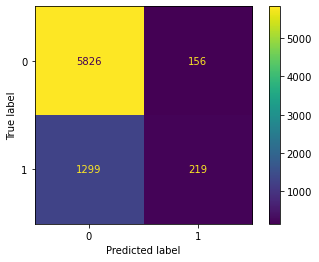

In [60]:
plot_confusion_matrix(model_3, Xnew_train_sc, y_train);

Noting the relatively high amount of false negative predictions shown above, I want to cross validate the recall score, and see just how much this model iteration missed the mark.

In [61]:
cross_val_score(model_3, Xnew_train_sc, y_train, cv=5, scoring='recall').mean()

0.14755080771235018

In [62]:
print('Model 3: Training Data Scores')
print('-----------------------------')
print(f'Accuracy:   {accuracy_score(y_train, model_3.predict(Xnew_train_sc))}')
print(f'Recall:     {recall_score(y_train, model_3.predict(Xnew_train_sc))}')
print(f'Precision:  {precision_score(y_train, model_3.predict(Xnew_train_sc))}')
print(f'F1:         {f1_score(y_train, model_3.predict(Xnew_train_sc))}')

Model 3: Training Data Scores
-----------------------------
Accuracy:   0.806
Recall:     0.1442687747035573
Precision:  0.584
F1:         0.23137876386687797


The accuracy score above is around 81% (a slight imprvement from model 1) because the model still appears to be functioning well to predict the custmers that will NOT leave, but that is not the goal. The company should not be as concerned with customers that are seemingly content.
- We're going to have to add more features and increase complexity to see if we can better-fit our model and raise this recall score!

### Model 4: Logistic Regression - Incorporation of Categorical Features, 'Complain' Column Remains Dropped

Now we need to create an X variable that includes all the columns, categorical AND numeric that still drops our target and the 'Complain' columns.

In [63]:
Xcat = df.drop(['Exited', 'Complain'], axis=1)
y = df['Exited']

In [64]:
Xcat_train, Xcat_test, y_train, y_test = train_test_split(Xcat, y, random_state=1)

In [65]:
# Beginnging to tackle categoricals
ohe = OneHotEncoder(drop='first') # Should I choose which to drop??
cats = ohe.fit_transform(Xcat_train[['Geography', 'Gender', 'Satisfaction Score', 'Card Type']])
cats_test = ohe.transform(Xcat_test[['Geography', 'Gender', 'Satisfaction Score', 'Card Type']])

# Getting a training DF
cats_df = pd.DataFrame(cats.todense(), columns=ohe.get_feature_names(),
                         index=X_train.index)

#Getting a testing DF
cats_test_df = pd.DataFrame(cats_test.todense(), columns=ohe.get_feature_names(),
                         index=X_test.index)

display(cats_df) # Checking these were properly made
display(cats_test_df)

,x0_Germany,x0_Spain,x1_Male,x2_2,x2_3,x2_4,x2_5,x3_GOLD,x3_PLATINUM,x3_SILVER
651,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6560,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8974,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2348,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5670,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2895,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7813,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5192,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


,x0_Germany,x0_Spain,x1_Male,x2_2,x2_3,x2_4,x2_5,x3_GOLD,x3_PLATINUM,x3_SILVER
9953,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3850,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4962,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3886,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5437,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6955,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
557,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2455,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3920,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [66]:
#Scaling the numeric columns again, less the 'Complain' column:
numeric_lessComp = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                   'EstimatedSalary', 'Point Earned']

#Scaling training AND testing dat
Xcat_train_num = Xcat_train[numeric_lessComp]
Xcat_test_num = X_test[numeric_lessComp]

Xcat_train_num_sc = scaler.fit_transform(Xcat_train_num)
Xcat_test_num_sc = scaler.transform(Xcat_test_num)

In [67]:
# Training df
nums_df = pd.DataFrame(Xcat_train_num_sc, columns=numeric_lessComp,
                         index=X_train.index)

# Testing df
nums_test_df = pd.DataFrame(Xcat_test_num_sc, columns=numeric_lessComp,
                         index=X_test.index)

display(nums_df.head())
display(nums_test_df.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Point Earned
651,0.719980,1.256181,0.683089,-1.228601,-0.910949,0.642621,0.983339,-1.480501,0.305470
6560,-0.753272,-0.659527,-1.397668,-1.228601,0.800932,0.642621,-1.016944,-1.565230,1.281518
8974,0.575745,0.394112,-1.397668,-1.228601,0.800932,0.642621,-1.016944,-1.182108,1.701086
2348,1.791436,0.585683,-0.704082,0.844319,-0.910949,-1.556128,-1.016944,-0.692551,1.316850
5670,-1.577469,-0.659527,1.029882,-1.228601,0.800932,0.642621,-1.016944,-0.567289,-0.842822


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Point Earned
9953,-1.031438,0.777254,-1.050875,-1.228601,0.800932,0.642621,0.983339,-0.051614,0.817784
3850,0.307881,-0.467956,-0.704082,1.070261,-0.910949,0.642621,-1.016944,-0.581850,0.376134
4962,-1.227185,0.298327,-1.050875,-1.228601,0.800932,-1.556128,0.983339,-0.164844,-0.233344
3886,0.616955,-0.467956,1.029882,1.143103,0.800932,-1.556128,0.983339,-1.710085,1.356598
5437,-1.103556,-0.851098,0.336297,-0.049737,-0.910949,0.642621,0.983339,1.331410,0.327552


In [68]:
# Concatinating training data
X_features = pd.concat([nums_df, cats_df], axis=1)

# Concatinating testing data
X_test_features = pd.concat([nums_test_df, cats_test_df], axis =1)

display(X_features.head())
display(X_test_features.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Point Earned,x0_Germany,x0_Spain,x1_Male,x2_2,x2_3,x2_4,x2_5,x3_GOLD,x3_PLATINUM,x3_SILVER
651,0.719980,1.256181,0.683089,-1.228601,-0.910949,0.642621,0.983339,-1.480501,0.305470,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6560,-0.753272,-0.659527,-1.397668,-1.228601,0.800932,0.642621,-1.016944,-1.565230,1.281518,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8974,0.575745,0.394112,-1.397668,-1.228601,0.800932,0.642621,-1.016944,-1.182108,1.701086,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2348,1.791436,0.585683,-0.704082,0.844319,-0.910949,-1.556128,-1.016944,-0.692551,1.316850,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5670,-1.577469,-0.659527,1.029882,-1.228601,0.800932,0.642621,-1.016944,-0.567289,-0.842822,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Point Earned,x0_Germany,x0_Spain,x1_Male,x2_2,x2_3,x2_4,x2_5,x3_GOLD,x3_PLATINUM,x3_SILVER
9953,-1.031438,0.777254,-1.050875,-1.228601,0.800932,0.642621,0.983339,-0.051614,0.817784,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3850,0.307881,-0.467956,-0.704082,1.070261,-0.910949,0.642621,-1.016944,-0.581850,0.376134,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4962,-1.227185,0.298327,-1.050875,-1.228601,0.800932,-1.556128,0.983339,-0.164844,-0.233344,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3886,0.616955,-0.467956,1.029882,1.143103,0.800932,-1.556128,0.983339,-1.710085,1.356598,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5437,-1.103556,-0.851098,0.336297,-0.049737,-0.910949,0.642621,0.983339,1.331410,0.327552,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


For this model, we will use the default LogisticRegression parameters when we instantiate the model:

In [69]:
model_4 = LogisticRegression()

In [70]:
model_4.fit(X_features, y_train)

LogisticRegression()

As we identified above, we want to focus on Recall, so I've cross-validated the recall score for this set of training data to ensure it aligns with the overall training data recall score (printed below).

In [71]:
cross_val_score(model_4, X_features, y_train, scoring='recall').mean()

0.2068568698975161

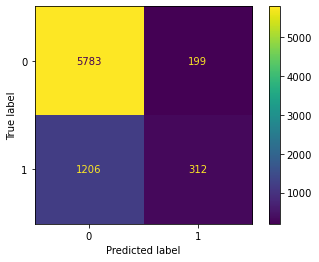

In [72]:
plot_confusion_matrix(model_4, X_features, y_train);

In [73]:
print('Model 4: Training Data Scores')
print('-----------------------------')
print(f'Accuracy:   {accuracy_score(y_train, model_4.predict(X_features))}')
print(f'Recall:     {recall_score(y_train, model_4.predict(X_features))}')
print(f'Precision:  {precision_score(y_train, model_4.predict(X_features))}')
print(f'F1:         {f1_score(y_train, model_4.predict(X_features))}')

Model 4: Training Data Scores
-----------------------------
Accuracy:   0.8126666666666666
Recall:     0.20553359683794467
Precision:  0.6105675146771037
F1:         0.30754066042385414


Our model has improved on all of the scores when the categorical data was added. 
- the recall score being our focus, notably changed from .14 to .21. This is still not as high as we would like it to be, so we will continue tweaking the model parameters to raise this score

### Model 5: Logistic Regression - Tweaking the Penalty Parameter

For this model, I am changing the penalty parameter to 'none', which may or may not be effective with the smaller number of features we are analyzing, as an attempt to increase our recall score by minizing the number of False Negatives. 

In [74]:
model_5 = LogisticRegression(penalty='none')

In [75]:
model_5.fit(X_features, y_train)

LogisticRegression(penalty='none')

In [76]:
recall_score(y_train, model_5.predict(X_features))

0.20619235836627142

In [77]:
cross_val_score(model_5, X_features, y_train, scoring='recall').mean()

0.20751476463435817

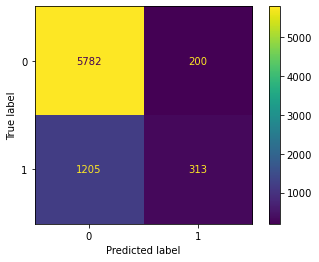

In [78]:
plot_confusion_matrix(model_5, X_features, y_train);

In [79]:
print('Model 5: Training Data Scores')
print('-----------------------------')
print(f'Accuracy:   {accuracy_score(y_train, model_5.predict(X_features))}')
print(f'Recall:     {recall_score(y_train, model_5.predict(X_features))}')
print(f'Precision:  {precision_score(y_train, model_5.predict(X_features))}')
print(f'F1:         {f1_score(y_train, model_5.predict(X_features))}')

Model 5: Training Data Scores
-----------------------------
Accuracy:   0.8126666666666666
Recall:     0.20619235836627142
Precision:  0.6101364522417154
F1:         0.3082225504677498


Comparing Model 5 to Model 4, there is very little (almost no) difference in the Recall score (or really any of the scores). Will have to try different methods to have a greater effect on Recall.

### Model 6: Logistic Regression - Reducing Regularization

For the 6th model, I will attempt to reduce regularization by increasing the C value parameter:

In [80]:
model_6 = LogisticRegression(C=10000)

In [81]:
model_6.fit(X_features, y_train)

LogisticRegression(C=10000)

In [82]:
recall_score(y_train, model_6.predict(X_features))

0.20619235836627142

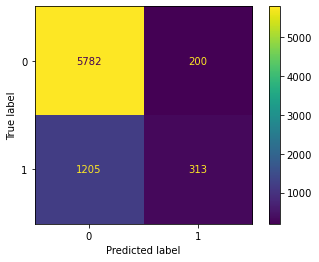

In [83]:
plot_confusion_matrix(model_6, X_features, y_train);

In [84]:
print('Model 6: Training Data Scores')
print('-----------------------------')
print(f'Accuracy:   {accuracy_score(y_train, model_6.predict(X_features))}')
print(f'Recall:     {recall_score(y_train, model_6.predict(X_features))}')
print(f'Precision:  {precision_score(y_train, model_6.predict(X_features))}')
print(f'F1:         {f1_score(y_train, model_6.predict(X_features))}')

Model 6: Training Data Scores
-----------------------------
Accuracy:   0.8126666666666666
Recall:     0.20619235836627142
Precision:  0.6101364522417154
F1:         0.3082225504677498


Similar to Model 5 and Model 6, this was not an effective tunign strategy to increase the recall score.

### Model 7: Logistic Regression - Addressing Class Imbalance

Of note, the distribution of the positive and negative class is around 20 and 80 percent respectively. To address this class imbalance, I will change the class_weight parameter to balanced when instantiating model_7.

In [85]:
model_7 = LogisticRegression(class_weight='balanced', penalty='none')
model_7.fit(X_features, y_train)

LogisticRegression(class_weight='balanced', penalty='none')

In [86]:
cross_val_score(model_7, X_features, y_train, scoring='recall').mean()

0.689719037693243

In [87]:
recall_score(y_train, model_7.predict(X_features))

0.6956521739130435

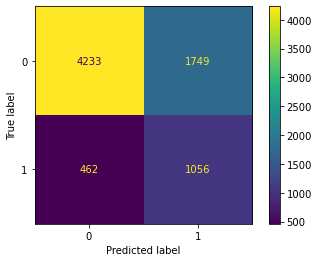

In [88]:
plot_confusion_matrix(model_7, X_features, y_train);

In [89]:
print('Model 7: Training Data Scores')
print('-----------------------------')
print(f'Accuracy:   {accuracy_score(y_train, model_7.predict(X_features))}')
print(f'Recall:     {recall_score(y_train, model_7.predict(X_features))}')
print(f'Precision:  {precision_score(y_train, model_7.predict(X_features))}')
print(f'F1:         {f1_score(y_train, model_7.predict(X_features))}')

Model 7: Training Data Scores
-----------------------------
Accuracy:   0.7052
Recall:     0.6956521739130435
Precision:  0.3764705882352941
F1:         0.48854961832061067


The accuracy score of the training data run through thhis model is MUCH better and is an increase of around .49 from our initial model recall of .20. 

In order to see the impact of the individual features acting within the model, I will now analyze the coefficients associated with each feature: 

In [90]:
# match with features/column names
list(zip(X_features.columns, list(model_7.coef_[0])))

[('CreditScore', -0.046296270419932894),
 ('Age', 0.8016873506917891),
 ('Tenure', -0.0013182767684569007),
 ('Balance', 0.19060222030696933),
 ('NumOfProducts', -0.026334750186440176),
 ('HasCrCard', -0.042868984689442086),
 ('IsActiveMember', -0.4816758121516233),
 ('EstimatedSalary', 0.02579012387458076),
 ('Point Earned', -0.02820028364949556),
 ('x0_Germany', 0.7312305809409265),
 ('x0_Spain', 0.07007450847622401),
 ('x1_Male', -0.5865858070944376),
 ('x2_2', 0.16559805688704793),
 ('x2_3', -0.0323206022127889),
 ('x2_4', -0.008015683471647595),
 ('x2_5', -0.015281306999602638),
 ('x3_GOLD', -0.10388779670733736),
 ('x3_PLATINUM', -0.04695161919310767),
 ('x3_SILVER', -0.021955080764875384)]

In [91]:
# Creating a dataframe as a preprocessing step before I can transfer my data to Tableau
# to start building visualizations.
coef = pd.DataFrame(data = [X_features.columns, list(model_7.coef_[0]), list(abs(model_7.coef_[0]))])
coef_df = coef.transpose()
coef_df

,0,1,2
0,CreditScore,-0.0462963,0.0462963
1,Age,0.801687,0.801687
2,Tenure,-0.00131828,0.00131828
3,Balance,0.190602,0.190602
4,NumOfProducts,-0.0263348,0.0263348
5,HasCrCard,-0.042869,0.042869
6,IsActiveMember,-0.481676,0.481676
7,EstimatedSalary,0.0257901,0.0257901
8,Point Earned,-0.0282003,0.0282003
9,x0_Germany,0.731231,0.731231


In [92]:
# Saving the df as a csv
coef_df.to_csv('coef_df.csv')

### Model 7 = Final Model

Now we can run our testing data through this model to see how the model performs on unseen data:

In [93]:
cross_val_score(model_7, X_test_features, y_test, scoring='recall').mean()

0.6846153846153846

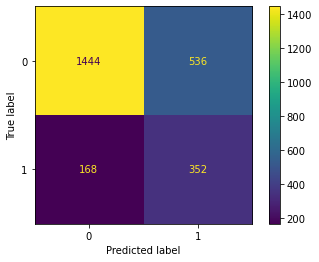

In [94]:
plot_confusion_matrix(model_7, X_test_features, y_test);

In [95]:
print('Final Model: Testing Data Scores')
print('-----------------------------')
print(f'Accuracy:   {accuracy_score(y_test, model_7.predict(X_test_features))}')
print(f'Recall:     {recall_score(y_test, model_7.predict(X_test_features))}')
print(f'Precision:  {precision_score(y_test, model_7.predict(X_test_features))}')
print(f'F1:         {f1_score(y_test, model_7.predict(X_test_features))}')

Final Model: Testing Data Scores
-----------------------------
Accuracy:   0.7184
Recall:     0.676923076923077
Precision:  0.3963963963963964
F1:         0.5


## Evaluation

This final model recall score increased significantly from our initial model recall score of around .20. This increase is due to addressing the imbalance of the positive and negative classes.

Next I will visualize the impacts of the key features identified in the analysis by graphing the absolute values of each features' coefficient. Of course, there are more features, but I chose 4 of each - 1 set is contributing to a customer leaving (or the probability that they will churn) and the second set displayed shows the 4 features that are contributing to the probability that a customer will stay with the bank.

![Churn_Features](images/Churn_Features.png)

- Age has the greatest impact after complaint. It appears that the higher the age, the higher the probability that customer will churn

- Account Balance - higher the account balance, more likely to churn


![Retention_Features](images/Retention_Features.png)

We can reverse engineer some inferences based on these feature impacts, which initially had negative coefficients, but I have displayed their absolute value for ease of understanding (as thier magnitude is not changed by switching signs from negative to positive in this case!).
- Male customers are less likely to churn compared to Females
    - Does our marketing appeal more towards males or is it some other factor?
- Activity - the more active a customer, the less likely they are to churn
    - How can we increase customer engagement?


## Recommendations

1. Redesign customer complaint process
    - Build a more robust customer support network
2. Using this model on all customer records moving forward to predict if a customer may churn
    - Run all future data through this model to identify any key factors for a client to determine the probability that they will churn.
3. Develop programs that engage older customers and female customers, encouraging them to remain active members

## Next Steps

1. Conduct complaint analysis 
2. Address customer frustrations identified in complaint analysis
3. Analyze the cost of different customer service strategies
    - Email campaigns vs. Customer calls
